In [60]:
%%capture
#!pip install wikipedia-api networkx matplotlib pandas;
import wikipediaapi;
import pandas as pd;
import networkx as nx;
import matplotlib.pyplot as plt;
import concurrent.futures;
import warnings;
from IPython.display import display;
from collections import Counter;
import seaborn as sns;


# Suppress warnings
warnings.simplefilter("ignore")
# List of Wikipedia pages to analyze
page_titles = ["Machine learning", "Artificial intelligence", "Data science", "Deep learning", "Neural network"]

# Initialize Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia(user_agent="DataScienceProject/1.0 (umais20@yahoo.com)", language='en')
# Dictionaries to count occurrences
category_counts = Counter()
link_counts = Counter()

# Extract data from each page
data = []
for title in page_titles:
    page = wiki_wiki.page(title)
    page_content = page.text

    # Extract categories (removing "Category:" prefix)
    categories = [cat.replace("Category:", "") for cat in page.categories.keys()]
    category_counts.update(categories)

    # Extract internal Wikipedia links
    links = list(page.links.keys())
    link_counts.update(links)

    # Store in DataFrame format
    data.append({
        "Title": title,
        "Categories": ", ".join(categories),
        #"Category Count": len(categories),
        #"Links Count": len(links),
        "links": ", ".join(links),
        "Page Text": page_content
    })

# Create a DataFrame for articles
df = pd.DataFrame(data)




In [61]:
# Display DataFrame
#pd.set_option("display.max_colwidth", None)
#display(df)



In [62]:
# Transpose the DataFrame to get the desired structure
df_transposed = df.melt(id_vars=['Title'], value_vars=['Categories', 'links'], var_name='Type', value_name='Value')

# Split the Value column by commas and explode the resulting lists into separate rows
df_transposed['Value'] = df_transposed['Value'].str.split(',')
df_final = df_transposed.explode('Value')

# Strip any leading or trailing whitespace from the values
df_final['Value'] = df_final['Value'].str.strip()

# Display the DataFrame
#pd.set_option("display.max_colwidth", None)
#display(df_final)

In [63]:
import pandas as pd

# Assuming df_final is already defined and contains the necessary data

# Filter the DataFrame to include only the rows where the Type column is 'Links'
df_links_only = df_final[df_final['Type'] == 'links']

# Display the new DataFrame
#pd.set_option("display.max_colwidth", None)
#display(df_links_only)

# Filter the DataFrame to include only the rows where the Type column is 'Links'
df_cat_only = df_final[df_final['Type'] == 'Categories']

# Display the new DataFrame
#pd.set_option("display.max_colwidth", None)
#display(df_cat_only)

In [64]:
# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df_links_only.iterrows():
    title = row['Title']
    value = row['Value']
    G.add_node(title, type='Title')
    G.add_edge(title, value)

'''
# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Wikipedia Articles Network")
plt.show()

# Display the DataFrame
pd.set_option("display.max_colwidth", None)
display(df_final)

'''

'\n# Draw the graph\nplt.figure(figsize=(12, 8))\npos = nx.spring_layout(G, k=0.5)\nnx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")\nplt.title("Wikipedia Articles Network")\nplt.show()\n\n# Display the DataFrame\npd.set_option("display.max_colwidth", None)\ndisplay(df_final)\n\n'

In [65]:
top_50_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
top_50_nodes = [node for node, degree in top_50_nodes]
subgraph = G.subgraph(top_50_nodes) 

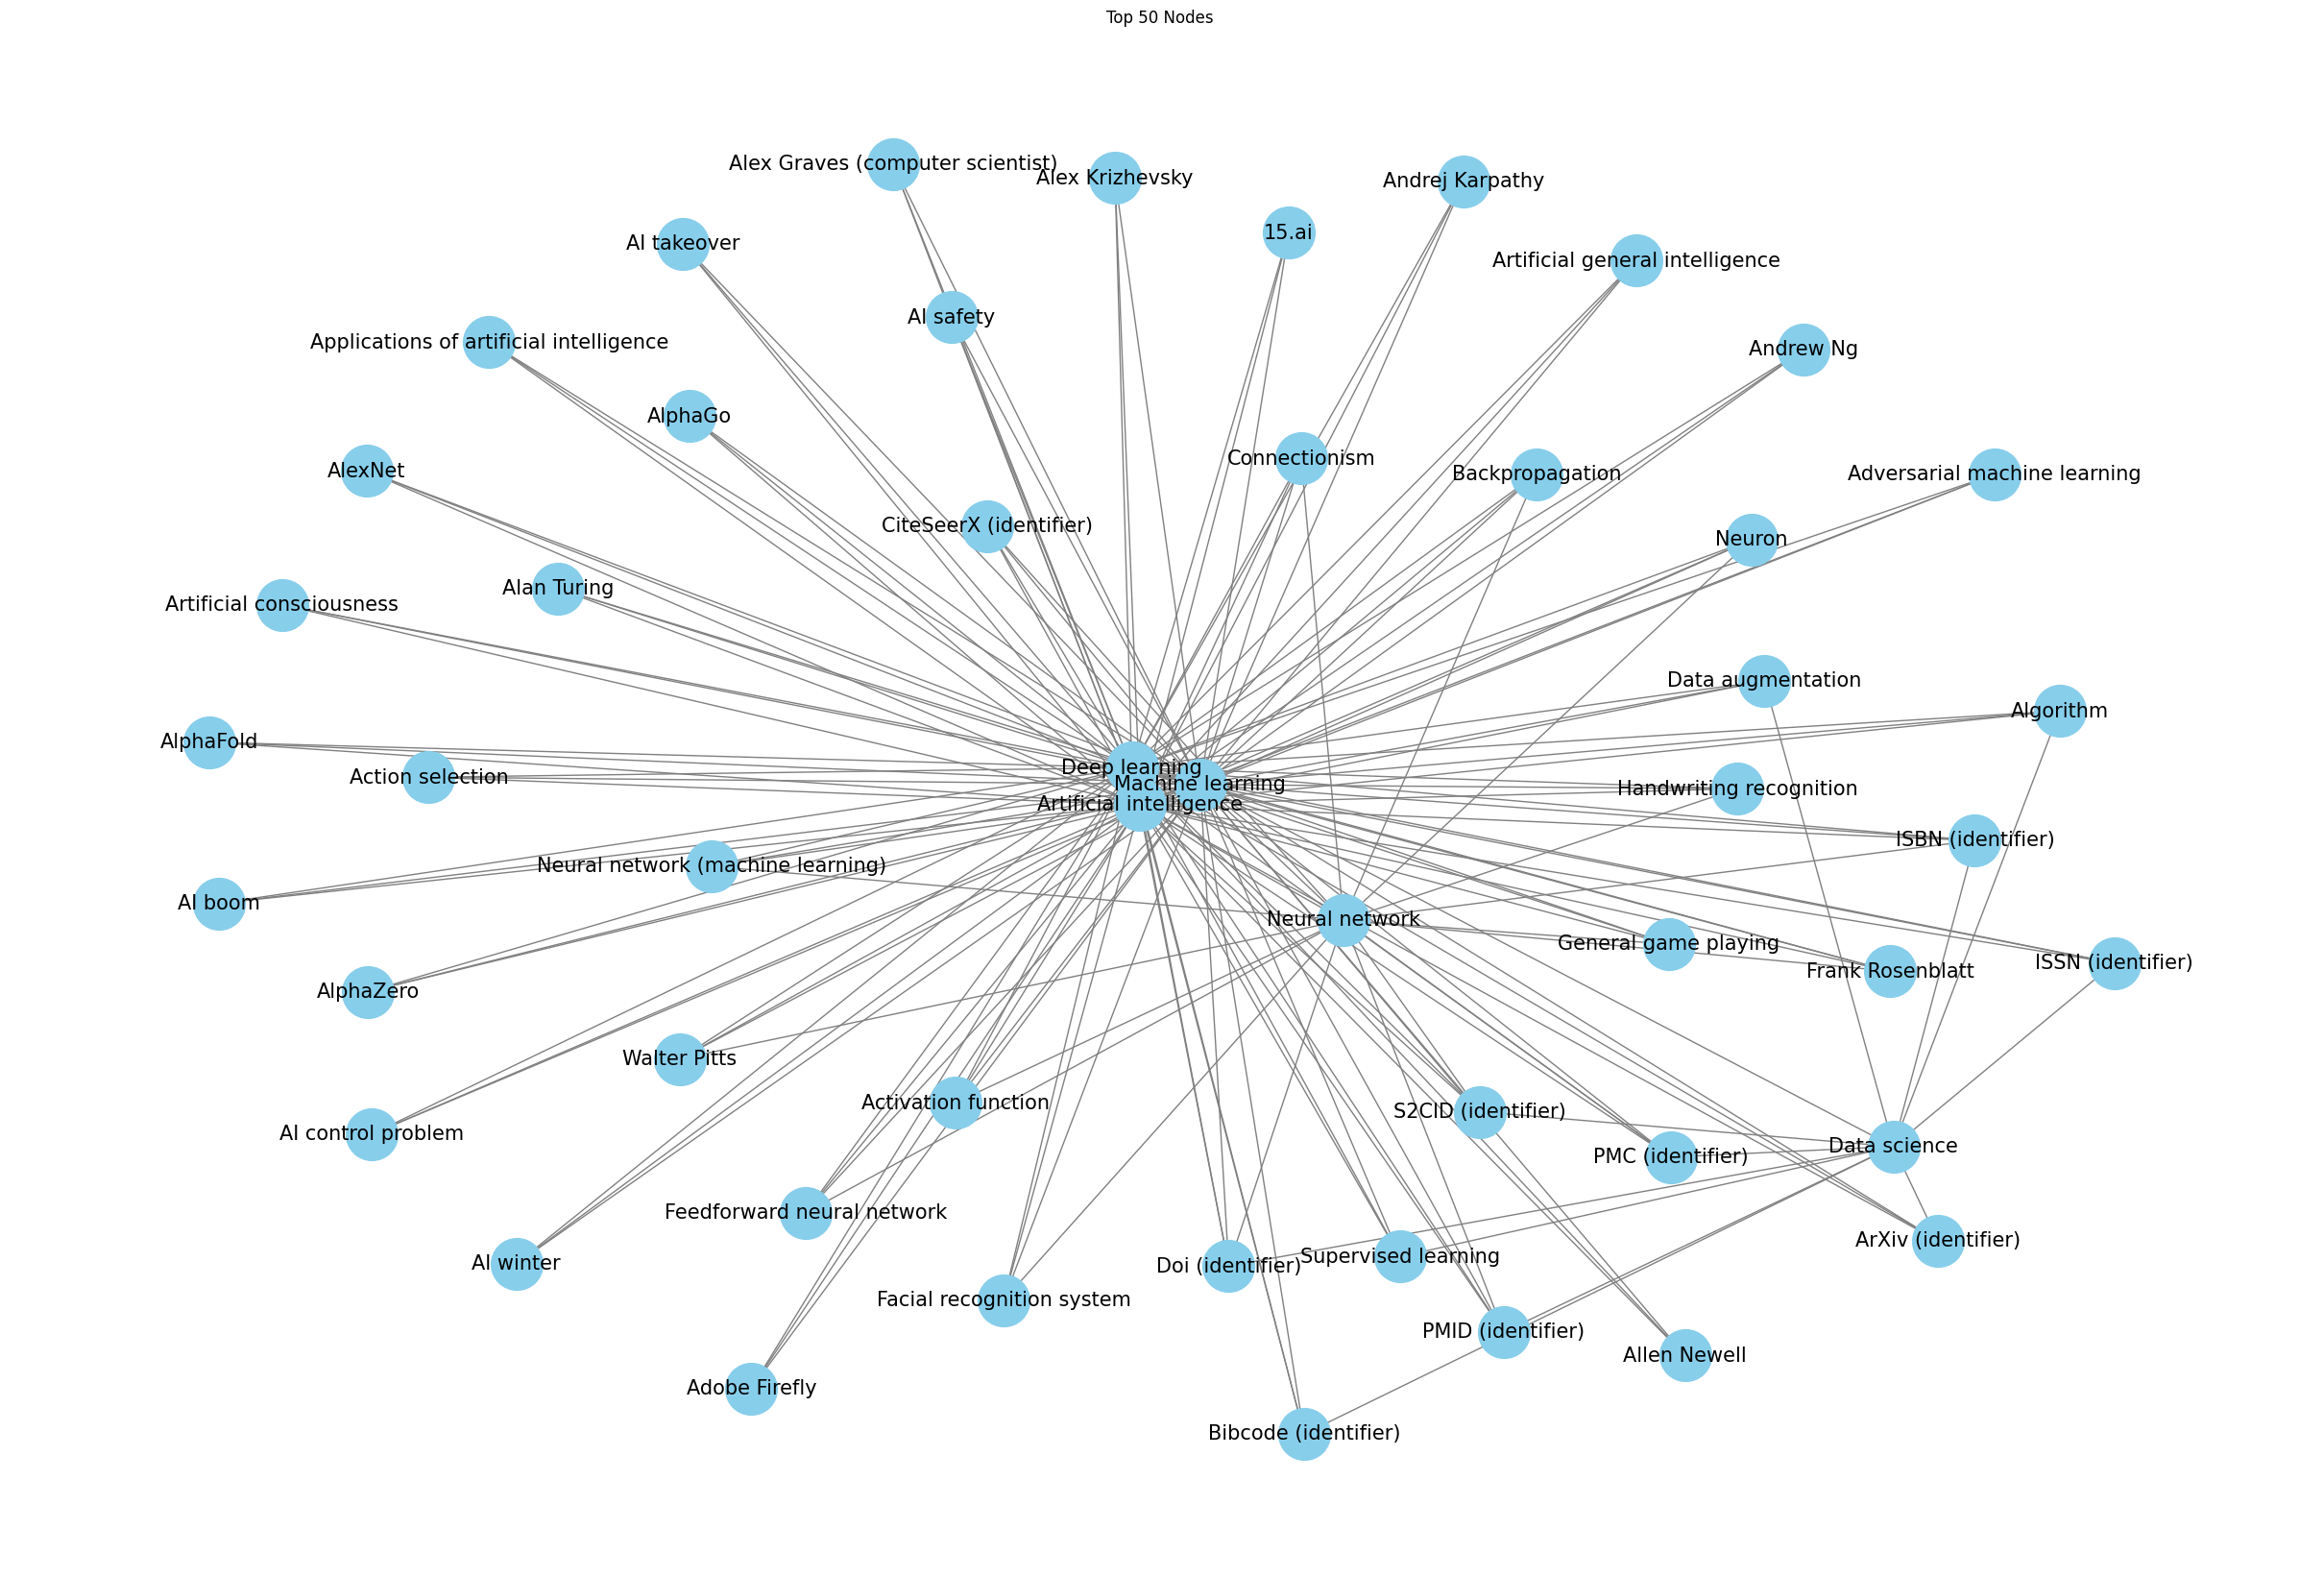

In [66]:
#Create a subgraph
subgraph = G.subgraph(top_50_nodes) 
plt.figure(figsize=(24, 16))
pos = nx.spring_layout(subgraph, k=0.1)  
nx.draw(subgraph, pos, node_size=1500, node_color='skyblue', edge_color='gray', with_labels=True, font_size=15, arrowsize=15)
plt.title("Top 50 Nodes ")
plt.show()

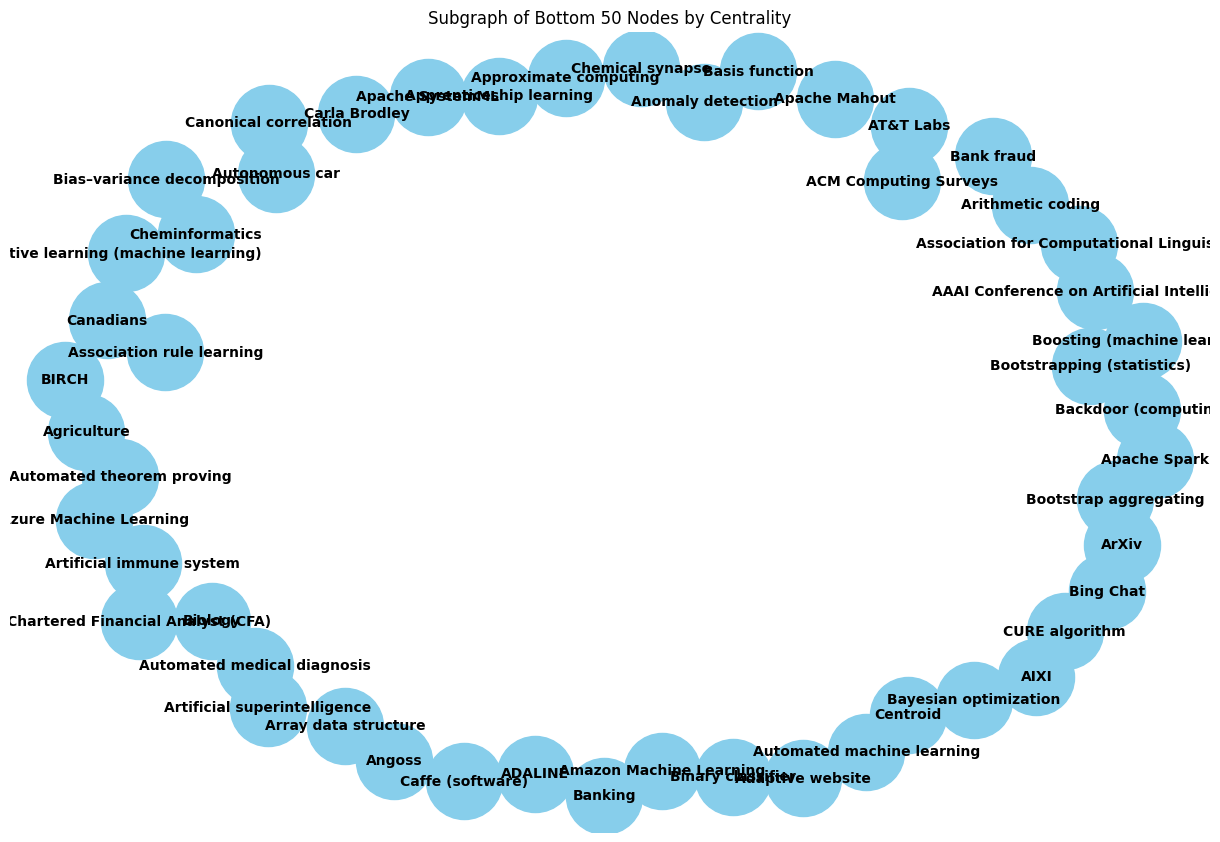

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df_links_only is already defined and contains the necessary data

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df_links_only.iterrows():
    title = row['Title']
    value = row['Value']
    G.add_node(title, type='Title')
    G.add_edge(title, value)

# Calculate the centrality of each node
centrality = nx.degree_centrality(G)

# Sort the nodes by their centrality values and get the bottom 50 nodes
bottom_50_nodes = sorted(centrality, key=centrality.get)[:50]

# Create a subgraph with the bottom 50 nodes
subgraph = G.subgraph(bottom_50_nodes)

# Draw the subgraph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw(subgraph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Subgraph of Bottom 50 Nodes by Centrality")
plt.show()

# Display the bottom 50 nodes and their centrality values
#bottom_50_centrality = {node: centrality[node] for node in bottom_50_nodes}
#print("Bottom 50 Nodes by Centrality:")
#for node, cent in bottom_50_centrality.items():
#    print(f"{node}: {cent}")

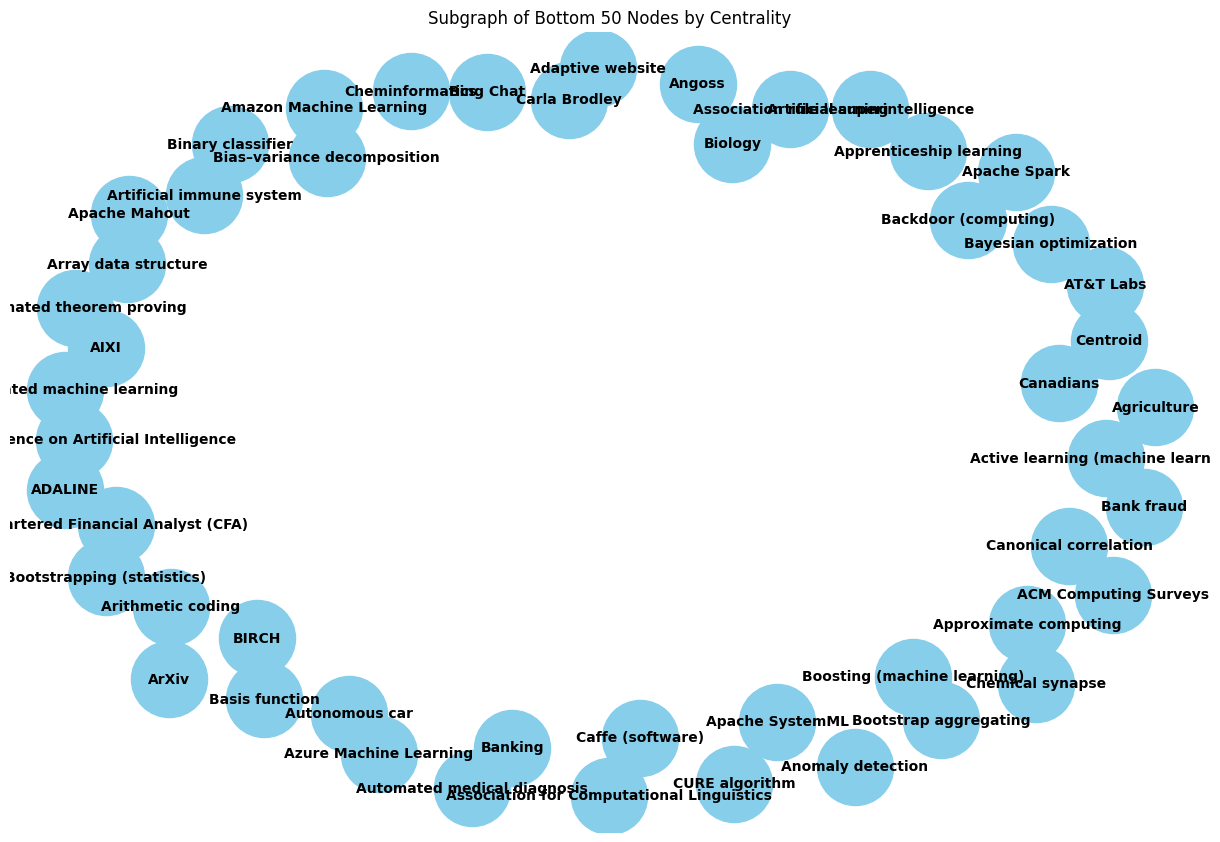

In [68]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# Assuming df_links_only is already defined and contains the necessary data

# Function to extract domain names from URLs
def extract_domain(url):
    try:
        domain = urlparse(url).netloc
        return domain
    except Exception as e:
        return None

# Function to categorize links by keywords
def categorize_link(url):
    if 'wikipedia' in url:
        return 'Wikipedia'
    elif 'github' in url:
        return 'GitHub'
    elif 'arxiv' in url:
        return 'ArXiv'
    else:
        return 'Other'

# Extract domain names and categorize links
df_links_only['Domain'] = df_links_only['Value'].apply(extract_domain)
df_links_only['Category'] = df_links_only['Value'].apply(categorize_link)

# Display the DataFrame with the new columns
#pd.set_option("display.max_colwidth", None)
#display(df_links_only)

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df_links_only.iterrows():
    title = row['Title']
    value = row['Value']
    G.add_node(title, type='Title')
    G.add_node(value, type='Link', domain=row['Domain'], category=row['Category'])
    G.add_edge(title, value)

# Calculate the centrality of each node
centrality = nx.degree_centrality(G)

# Sort the nodes by their centrality values and get the bottom 50 nodes
bottom_50_nodes = sorted(centrality, key=centrality.get)[:50]

# Create a subgraph with the bottom 50 nodes
subgraph = G.subgraph(bottom_50_nodes)

# Draw the subgraph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw(subgraph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Subgraph of Bottom 50 Nodes by Centrality")
plt.show()

# Display the bottom 50 nodes and their centrality values
#bottom_50_centrality = {node: centrality[node] for node in bottom_50_nodes}
#print("Bottom 50 Nodes by Centrality:")
#for node, cent in bottom_50_centrality.items():
#    print(f"{node}: {cent}")

In [69]:
import wikipediaapi
import pandas as pd


# List of Wikipedia pages to analyze
page_titles = ["Machine learning", "Artificial intelligence", "Data science", "Deep learning", "Neural network"]

# Initialize Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia(user_agent="DataScienceProject/1.0 (umais20@yahoo.com)", language='en')

# Function to extract categories and links for a given page title
def get_categories_and_links(title):
    page = wiki_wiki.page(title)
    if page.exists():
        categories = list(page.categories.keys())
        links = list(page.links.keys())
        return categories, links
    else:
        return [], []

# Function to extract links associated with each category
def get_links_for_category(category):
    page = wiki_wiki.page(category)
    if page.exists():
        return list(page.links.keys())
    else:
        return []

# Example data with Wikipedia page titles
data = [
    {"Title": "Machine learning"},
    {"Title": "Artificial intelligence"}, 
    {"Title":"Data science"}, 
    {"Title":"Deep learning"}, 
    {"Title":"Neural network"}
    # Add more titles as needed
]

# Create a DataFrame
df1 = pd.DataFrame(data)

# Extract categories and links for each page and add them to the DataFrame
df1['Categories'], df1['Links'] = zip(*df1['Title'].apply(get_categories_and_links))

# Initialize lists to store the final data
titles = []
categories = []
links = []

# Build the dataset during extraction
for _, row in df1.iterrows():
    title = row['Title']
    for category in row['Categories']:
        category_links = get_links_for_category(category)
        for link in category_links:
            titles.append(title)
            categories.append(category)
            links.append(link)

# Create the final DataFrame
df_final1 = pd.DataFrame({
    'Title': titles,
    'Category': categories,
    'Link': links
})

# Display the DataFrame
#pd.set_option("display.max_colwidth", None)
#display(df_final1)

In [70]:
df1.head()

,Title,Categories,Links
0,Machine learning,"[Category:Articles with excerpts, Category:Articles with short description, Category:Commons category link from Wikidata, Category:Cybernetics, Category:Definition, Category:Learning, Category:Machine learning, Category:Short description is different from Wikidata, Category:Webarchive template wayback links, Category:Wikipedia articles needing clarification from January 2024]","[15.ai, AAAI Conference on Artificial Intelligence, ACM Computing Classification System, ACM Computing Surveys, ADALINE, AIXI, AI alignment, AI boom, AI control problem, AI safety, AI takeover, AI winter, AT&T Labs, Accountability, Action selection, Activation function, Active learning (machine learning), Adaptive website, Adobe Firefly, Adversarial machine learning, Affective computing, Agriculture, Alan Mackworth, Alan Turing, AlexNet, Alex Graves (computer scientist), Alex Krizhevsky, Algorithm, Algorithm design, Algorithmic bias, Algorithmic efficiency, Algorithmic transparency, Allen Newell, AlphaFold, AlphaGo, AlphaZero, Amazon Machine Learning, Analysis of algorithms, Andrej Karpathy, Andrew Ng, Angoss, Anomaly detection, Apache Mahout, Apache Spark, Apache SystemML, Application security, Applications of artificial intelligence, Apprenticeship learning, Approximate computing, ArXiv, ArXiv (identifier), Arithmetic coding, Array data structure, Arthur Samuel (computer scientist), Artificial Intelligence: A Modern Approach, Artificial consciousness, Artificial general intelligence, Artificial immune system, Artificial intelligence, Artificial intelligence arms race, Artificial intelligence art, Artificial intelligence in government, Artificial intelligence in healthcare, Artificial intelligence in industry, Artificial intelligence in mental health, Artificial intelligence systems integration, Artificial neural network, Artificial neuron, Artificial superintelligence, Association for Computational Linguistics, Association rule learning, Astroinformatics, Attention (machine learning), Augmented reality, Aurora (text-to-image model), AutoGPT, Autoencoder, Automata theory, Automated decision-making, Automated machine learning, Automated medical diagnosis, Automated planning and scheduling, Automated theorem proving, Autonomous car, Autoregressive model, Azure Machine Learning, BERT (language model), BIRCH, BLOOM (language model), Backdoor (computing), Backpropagation, Bank fraud, Banking, Basis function, Batch learning, Batch normalization, Bayesian inference, Bayesian network, Bayesian optimization, Behaviorism, ...]"
1,Artificial intelligence,"[Category:All accuracy disputes, Category:All articles with unsourced statements, Category:Articles with Internet Encyclopedia of Philosophy links, Category:Articles with disputed statements from July 2024, Category:Articles with excerpts, Category:Articles with short description, Category:Articles with unsourced statements from June 2024, Category:Artificial intelligence, Category:CS1: long volume value, Category:CS1 German-language sources (de), Category:CS1 Japanese-language sources (ja), Category:Computational fields of study, Category:Computational neuroscience, Category:Cybernetics, Category:Data science, Category:Formal sciences, Category:Intelligence by type, Category:Pages displaying short descriptions of redirect targets via Module:Annotated link, Category:Pages using Sister project links with hidden wikidata, Category:Short description is different from Wikidata, Category:Use dmy dates from July 2023, Category:Webarchive template wayback links, Category:Wikipedia indefinitely semi-protected pages]","[15.ai, 2001: A Space Odyssey, 2001: A Space Odyssey (novel), 2024 Indian general election, 3D optical data storage, A* search algorithm, A.I. Artificial Intelligence, AAAI, ABB, ACM Computing Classification System, ACM Conference on Fairness, Accountability, and Transparency, ACM SIGPLAN Notices, AI, AI (disambiguation), AI Safety Institute (United Kingdom), AI 